In [1]:
%load_ext autoreload
%autoreload 2

## import general packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
import ipywidgets as widgets
%matplotlib nbagg


import os, sys, math

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)


## import darkMatter specific packages
from darkMatter import darkMatter
from utils.plots import *
from utils.parameters import create_population_values, set_options

In [2]:


#if Npop==1:
#    inpara['eta'] = [[0.]]
#    inpara['eps'] = [[0.]]
#    inpara['n'] = [[0]]
#else:
#    inpara['eta'] = [[0.],[0.2],[0.5],[0.8],[0.9]]
#    inpara['eps'] = [[0.],[0.1],[0.3],[0.5],[math.sqrt(0.5)]]
#    inpara['n'] = [[0]]
    
#### tau vs nu
# para_order = ['rateWnt','tau_G','alpha_0','n','eps','eta']
# inpara['n'] = [[0],[0],[0]]
# inpara['tau_G'] = [[0,100],[0,100],[0,100]]
# inpara['alpha_0']= [[0.01],[0.02],[0.04]]
# inpara['rateWnt'] = [[0,20],[0,20],[0,20]]

#### alpha vs tau
# para_order = ['tau_G','alpha_0','rateWnt','n','eps','eta']
# inpara['n'] = [[0],[0],[0]]
# inpara['tau_G'] = [[0,100],[0,100],[0,100]]
# inpara['alpha_0'] = [[0,0.1],[0,0.1],[0,0.1]]
# inpara['rateWnt'] = [[1],[2],[5]]

In [111]:
## brief sanity checks on provided parameters
def sanity_check(params,sim_steps):
    for key in params.keys():
        assert type(params[key]) == list, 'Please specify all parameters as lists of lists!'
        assert type(params[key][0]) == list, 'Please specify all parameters as lists of lists!'
        sim_steps = max(sim_steps,len(params[key]))
    return sim_steps

def align_lengths(params,sim_steps):
    for key in params.keys():
        if len(params[key]) == 1:
            params[key]*=sim_steps
        else:
            assert sim_steps == len(params[key]), 'Make sure all parameters are specified as having the same length (%s has length %d / %d)' % (key,len(params[key]),sim_steps)
    return params


def set_option_params(simulation_array,nE=0):
    
    #sim_steps = 0
    #sim_steps = sanity_check(options_array,sim_steps)
    #sim_steps = sanity_check(simulation_array,sim_steps)

    #options_array = align_lengths(options_array,sim_steps)
    #simulation_array = align_lengths(simulation_array,sim_steps)
    
    options = set_options(L=1,nI=1,nE=nE)
    options['mode_stats'] = 1
    
#    for key,val in options_array.items():
#        options[key] = val
    
    options['simulation'] = {}
    for key,val in simulation_array.items():
        options['simulation'][key] = val
    
    return options


## Create a simple parameter space plot

<IPython.core.display.Javascript object>


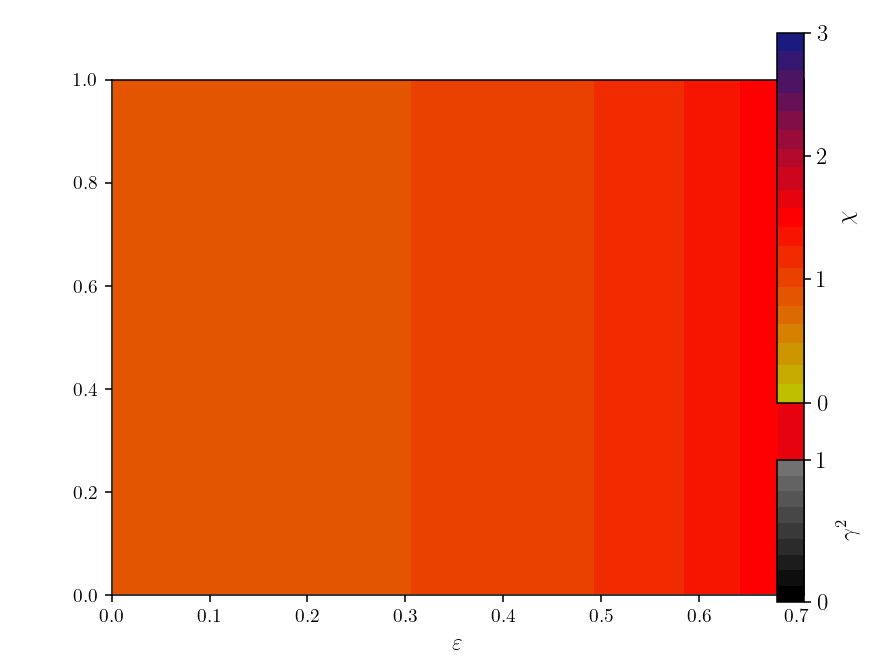

In [118]:
simulation_array = {
    'eps':[0,np.sqrt(1./2)],
    'tau_n': [0,1.],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}

options = set_option_params(simulation_array)
options['tau_I'] = 0.03
order = [o for o in list(options['simulation']) if not o.startswith('sim')]

res = darkMatter(steps=200,options=options,cleanup=False,rerun=True,compile=False,logging=2)

fig,ax = plt.subplots(1,1)
## plotting sharkfins for each solution
p = 0
pchi,pgamma = plot_fins(ax,res[order[0]],res[order[1]],
    res['gamma'][p,...],res['chi'][p,...],res['regions'][p,...],implausible=res['implausible'][p,...])
plt.setp(ax,xlabel=get_displayString(order[0]),ylabel=get_displayString(order[1]))

plot_colorbar(pchi,pgamma,x=[0.87,0.9],y=[0.1,0.95])

## Create a 3D plot with tomographic slices across all dimensions

<IPython.core.display.Javascript object>


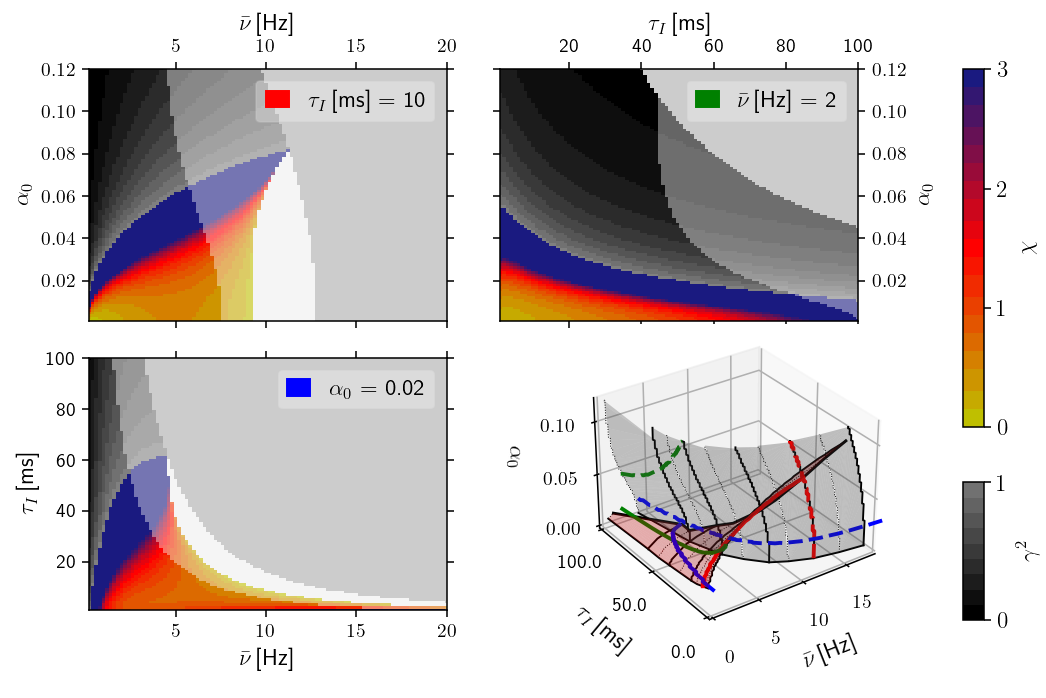

tau_I [0.01] (100,)
rateWnt [2.0] (100,)
alpha_0 [0.02] (100,)


/tmp/ipykernel_4177339/2901519368.py:146: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][1].set_xticklabels(labels)
/tmp/ipykernel_4177339/2901519368.py:163: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][0].set_yticklabels(labels)


In [19]:
rerun = False
steps = 100
fig,ax = plt.subplots(2,2,figsize=(7.5,5))

pos = ax[1][1].get_position()
ax_3D = plt.axes([pos.x0 - 0.125, pos.y0-0.025,  pos.width + 0.2, pos.height + 0.1],projection='3d')
ax[1][1].remove()
ax_3D.view_init(30, -125)

#parameters = ['tau_I','rateWnt','alpha_0']
simulation_array = {
    'rateWnt':[0,20],
    'alpha_0': [0,0.12],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}


#simulation_array = {
#    'tau_I': [0,0.1],
#    'rateWnt':[0,20],
#    'sim_prim': [0,-1,0],
#    'sim_sec': [0,-1,0]
#}
para = {
    #'alpha_0': [0.,0.01,0.02,0.04,0.06,0.08,0.1,0.15,0.2],
    'tau_I': [0.005,0.007,0.01,0.015,0.02,0.03,0.04,0.05,0.06,0.1],
    #'eps': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,np.sqrt(1./2)]
}

px,pz = [o for o in list(simulation_array) if not o.startswith('sim')]
py = list(para.keys())[0]

plot_order = [px,py,pz]

#plot_order = ['rateWnt','tau_I','alpha_0']
#plot_order = ['tau_I','rateWnt','alpha_0']


results = []

for i,para_val in enumerate(para[py]):
    
    options = set_option_params(simulation_array)
    options = options|{py:para_val,'rateWnt':2.}
    
    res = darkMatter(steps=steps,options=options,cleanup=False,rerun=rerun,compile=False,logging=3)
    results.append(res)

plot_3D(ax_3D,results,[px,py,pz],para[py])
plt.setp(ax_3D,xlabel=get_displayString(plot_order[0]),
             ylabel=get_displayString(plot_order[1]),
             zlabel=get_displayString(plot_order[2]))



set_plot_params()


def plot_phase_space(ax,ax_3D,plot_order,simulation_array,col='r',steps=100,rerun=False):
    
    ## define parameters first
    options = set_option_params(simulation_array)
    options = options|{'alpha_0':0.02,'rateWnt':2.}
    #options['tau_I'] = 0.01
    
    order = [o for o in list(options['simulation']) if not o.startswith('sim')]
    for key in plot_order:
        if not (key in order):
            # const defined by remaining val in plot_order
            order.append(key)
            options[key] = options[key] if isinstance(options[key],list) else [options[key]]
            break
    
    res = darkMatter(steps=steps,options=options,cleanup=False,rerun=rerun,compile=False,logging=3)

    ## plotting sharkfins for each solution
    p = 0
    pchi,pgamma = plot_fins(ax,res[order[0]],res[order[1]],
        res['gamma'][p,...],res['chi'][p,...],res['regions'][p,...],implausible=res['implausible'][p,...])
    if order[2]=='tau_I':
        color_patch = mpatches.Patch(color=col, 
             label='%s = %d' % (get_displayString(order[2]),options[order[2]][0]*10**3))
    else:
        color_patch = mpatches.Patch(color=col, 
             label='%s = %.3g' % (get_displayString(order[2]),options[order[2]][0]))
    legend = ax.legend(handles=[color_patch],loc='upper right',facecolor='w',framealpha=0.3,handlelength=1)

        #ax.set_title('%s = %.3g' % (get_displayString(order[2]),options[order[2]][0]),fontsize=12,loc='right',x=0.95,y=0.8)
    
    ## DM transition lines
    data = {0:None,1:None,2:None}
    data_mask = ~res['DM_trans'][p,:,0].mask
    #print(data_mask.shape,res['DM_trans'].shape)
    #print(np.where(data_mask))
    data[plot_order.index(order[0])] = res[order[0]][res['DM_trans'][p,data_mask,0]]
    data[plot_order.index(order[1])] = res[order[1]][np.where(data_mask)[0]]
    print(order[2],options[order[2]],data_mask.shape)
    data[plot_order.index(order[2])] = np.full(data_mask.sum(),options[order[2]])
    #print(res['DM_trans'])
    #print(data)
    
    ax_3D.plot(data[0],data[1],data[2],ls='-',color=col,lw=2)
    
    last_DM = data[2][-1]
    
    ## inc transition lines
    data = {0:None,1:None,2:None}
    data_mask = ~res['inc_trans'].mask
    if not (len(np.array(data_mask).shape)>1):
        data_mask = np.full((steps,1),True,'bool')
    data[plot_order.index(order[0])] = res[order[0]][res['inc_trans'][data_mask]]
    data[plot_order.index(order[1])] = res[order[1]][np.where(data_mask)[0]]
    data[plot_order.index(order[2])] = np.full(data_mask.sum(),options[order[2]])
    
    ax_3D.plot(data[0],data[1],data[2],ls='--',color=col,lw=2)
    return pchi,pgamma


simulation_array = {
    'rateWnt':[0,20],
    'alpha_0': [0,0.12],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}

pchi,pgamma = plot_phase_space(ax[0][0],ax_3D,plot_order,simulation_array,col='r',steps=steps,rerun=rerun)
ax[0][0].tick_params(top=True, labeltop=True, bottom=True, labelbottom=False, 
                     left=True,labelleft=True,right=True,labelright=False)
plt.setp(ax[0][0],xlabel=get_displayString('rateWnt'),ylabel=get_displayString('alpha_0'))
ax[0][0].xaxis.set_label_position('top')

plot_colorbar(pchi,pgamma,x=[0.92,0.94],y=[pos.y0,0.9])

simulation_array = {
    'tau_I':[0,0.1],
    'alpha_0': [0,0.12],
    'sim_prim': [0,0,-1],
    'sim_sec': [0,-1,0]
}
plot_phase_space(ax[0][1],ax_3D,plot_order,simulation_array,col='g',steps=steps,rerun=rerun)

ax[0][1].tick_params(top=True, labeltop=True, bottom=True, labelbottom=False, 
                     left=True,labelleft=False,right=True,labelright=True)
labels = ['%d'%(item*10**3) for item in ax[0][1].get_xticks()]
ax[0][1].set_xticklabels(labels)

plt.setp(ax[0][1],xlabel=get_displayString('tau_I'),ylabel=get_displayString('alpha_0'))
ax[0][1].xaxis.set_label_position('top')
ax[0][1].yaxis.set_label_position('right')


simulation_array = {
    'rateWnt': [0,20],
    'tau_I':[0,0.1],#[[0,rate[0]] for rate in (1./(2.*math.pi*np.sqrt(tau_M*np.array(inpara['tau_G']))))
    'sim_prim': [0,-1,0],
    'sim_sec': [0,0,-1]
}
plot_phase_space(ax[1][0],ax_3D,plot_order,simulation_array,col='b',steps=steps,rerun=rerun)
ax[1][0].tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, 
                     left=True,labelleft=True,right=True,labelright=False)
labels = ['%d'%(item*10**3) for item in ax[1][0].get_yticks()]
ax[1][0].set_yticklabels(labels)

plt.setp(ax[1][0],xlabel=get_displayString('rateWnt'),ylabel=get_displayString('tau_I'))
plt.subplots_adjust(left=0.085, bottom=0.125, right=0.82, top=0.9, wspace=0.15, hspace=0.15)


save = False
if save:
    file_format = 'png'
    sv_name = '../figures/shark_steps=%d_%s_%s.%s' % (steps,plot_order[0],plot_order[1],file_format)
    plt.savefig(sv_name,dpi=300)
    print('Figure saved as "%s"' % sv_name)


## Create parameter space plots for 2-population

TODO:
* check for proper definition of implausible region!!

<IPython.core.display.Javascript object>


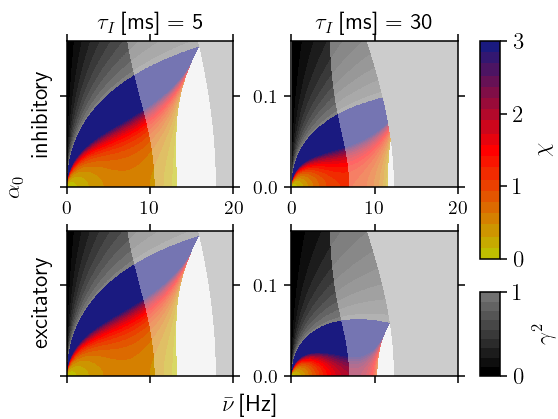

Figure saved as "../figures/parameter_space_steps=500_rateWnt_alpha_0.png"


In [138]:
steps = 500
rerun = False

options = set_options(L=1,nI=1,nE=1)
options['simulation'] = {
#    'eta': [0,0.99],
    'rateWnt': [0,20],
    'alpha_0': [0.,0.16],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}
para = {
#    'rateWnt': [1.,5.],
    'tau_I': [[0.005,0.005,0.2],[0.03,0.005,0.2]]
}

px,pz = [o for o in list(options['simulation']) if not o.startswith('sim')]
py = list(para.keys())[0]

#options = options|{'mode_stats':0,'tau_n':0, 'tau_I':[0.03,0.005,0.2]}
options = options|{'mode_stats':0,'tau_n':0, 'rateWnt':[2.], 'eta':0.7}

order = [px,py,pz]

plt_para = {
    'ax_label': [],
    'const_label': []
}

fig,ax = plt.subplots(2,len(para[py]),figsize=(4,3),dpi=100)
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.82, top=0.9, wspace=0.35, hspace=0.3)

for i,para_val in enumerate(para[py]):
    options[py] = para_val
    res = darkMatter(steps=steps,options=options,logging=3,rerun=rerun,compile=False)
    
    for p in range(2):
        pchi,pgamma = plot_fins(ax[p,i],
              res[px],res[pz],res['gamma'][p,...],res['chi'][p,...],
              res['regions'][p,...],res['implausible'][p,...])
    
    if py=='tau_I':
        ax[0,i].set_title(f'{get_displayString(py)} = {int(para_val[0]*10**3)}',fontsize=12)
    else:
        ax[0,i].set_title(f'{get_displayString(py)} = {para_val}',fontsize=12)

for r,ax_row in enumerate(ax):
    for c,axx in enumerate(ax_row):
        axx.tick_params(top=True, labeltop=False, bottom=True, labelbottom=r==0)
        axx.tick_params(left=True,labelleft=c==1,right=True,labelright=False)
        
        if c==0:
            plt.setp(axx,ylabel='inhibitory' if r==0 else 'excitatory')
    

big_ax = fig.add_axes([0.125,0.15,0.65,0.8])
big_ax.set_facecolor('none')
big_ax.tick_params(labelcolor='none',top=False,bottom=False,left=False,right=False)
big_ax.spines[['top','right','bottom','left']].set_visible(False)

plot_colorbar(pchi,pgamma,x=[0.86,0.895],y=[0.1,0.9])

plt.setp(big_ax,xlabel=get_displayString(px),ylabel=get_displayString(pz))


save = True
if save:
    file_format = 'png'
    sv_name = '../figures/parameter_space_steps=%d_%s_%s.%s' % (steps,px,pz,file_format)
    plt.savefig(sv_name,dpi=300)
    print('Figure saved as "%s"' % sv_name)
else:
    plt.show(block=False)

## Create parameter space plots for 2-population (but only displaying 1-pop)

{'L': 1, 'P': 2, 'S': [1, 2], 'eps': 0.7071067811865475, 'eta': 0.9, 'J0_l': array([[0.]]), 'I_ext': 1, 'rateWnt': 1.0, 'kappa': [1.0, 1.0], 'alpha_0': 0.01, 'Psi_0': 0.0, 'tau_M': 0.01, 'J0': [-1.0, 1.0], 'tau_I': [0.03, 0.005, 0.2], 'tau_n': 0, 'tau_norm': 1.0, 'mode': 0, 'mode_stats': 0, 'mode_calc': 0, 'mode_selfcon': 0, 'simulation': {'eps': [0, 0.7071067811865476], 'alpha_0': [0.0, 0.1], 'sim_prim': [0, -1, 0], 'sim_sec': [0, -1, 0]}}


<IPython.core.display.Javascript object>


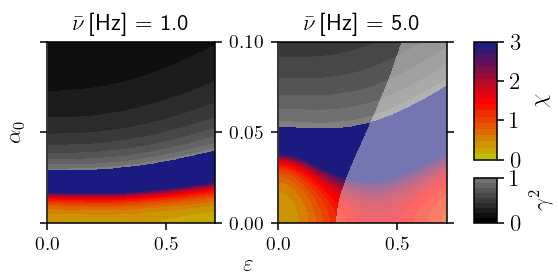

Figure saved as "../figures/parameter_space_1pop_steps=500_rateWnt_tau_I.png"


In [128]:
steps = 500
rerun = False

options = set_options(L=1,nI=1,nE=1)
options['simulation'] = {
    'eps': [0,np.sqrt(1./2)],
    #'rateWnt': [0,20],
    'alpha_0': [0.,0.1],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}
para = {
    'rateWnt': [1.,5.],
#    'tau_I': [[0.005,0.005,0.2],[0.03,0.005,0.2]]
}

px,pz = [o for o in list(options['simulation']) if not o.startswith('sim')]
py = list(para.keys())[0]

options = options|{'mode_stats':0,'tau_n':0, 'tau_I':[0.03,0.005,0.2]}
#options = options|{'mode_stats':0,'tau_n':0, 'rateWnt':[2.], 'eta':0.7}

print(options)

order = [px,py,pz]

plt_para = {
    'ax_label': [],
    'const_label': []
}

plot_top = 0.85

fig,ax = plt.subplots(1,len(para[py]),figsize=(4,2),dpi=100)
plt.subplots_adjust(left=0.085, bottom=0.2, right=0.8, top=plot_top, wspace=0.375, hspace=0.15)

p=0
for i,para_val in enumerate(para[py]):
    options[py] = para_val
    res = darkMatter(steps=steps,options=options,logging=3,rerun=rerun,compile=False)
    
    #for p in range(2):
    pchi,pgamma = plot_fins(ax[i],
          res[px],res[pz],res['gamma'][p,...],res['chi'][p,...],
          res['regions'][p,...],res['implausible'][p,...])
    
    ax[i].set_title(f'{get_displayString(py)} = {para_val}',fontsize=12)
#for r,ax_row in enumerate(ax):
for c,axx in enumerate(ax):
    plt.setp(axx,yticks=np.linspace(options['simulation'][pz][0],options['simulation'][pz][1],3))

    axx.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
    axx.tick_params(left=True,labelleft=False,right=True,labelright=c==0)
    
    
    #if c==0:
    #    plt.setp(axx,ylabel='inhibitory' if r==0 else 'excitatory')
    

big_ax = fig.add_axes([0.145,0.225,0.6,0.6])
big_ax.set_facecolor('none')
big_ax.tick_params(labelcolor='none',top=False,bottom=False,left=False,right=False)
big_ax.spines[['top','right','bottom','left']].set_visible(False)

plot_colorbar(pchi,pgamma,x=[0.85,0.89],y=[0.2,plot_top])

plt.setp(big_ax,xlabel=get_displayString(px),ylabel=get_displayString(pz))


save = True
if save:
    file_format = 'png'
    sv_name = '../figures/parameter_space_1pop_steps=%d_%s_%s.%s' % (steps,order[0],order[1],file_format)
    plt.savefig(sv_name,dpi=300)
    print('Figure saved as "%s"' % sv_name)
else:
    plt.show(block=False)

## Try 3D plot with different axes

* Should be fixed
* try 3d with eps,eta,tau_n

<IPython.core.display.Javascript object>


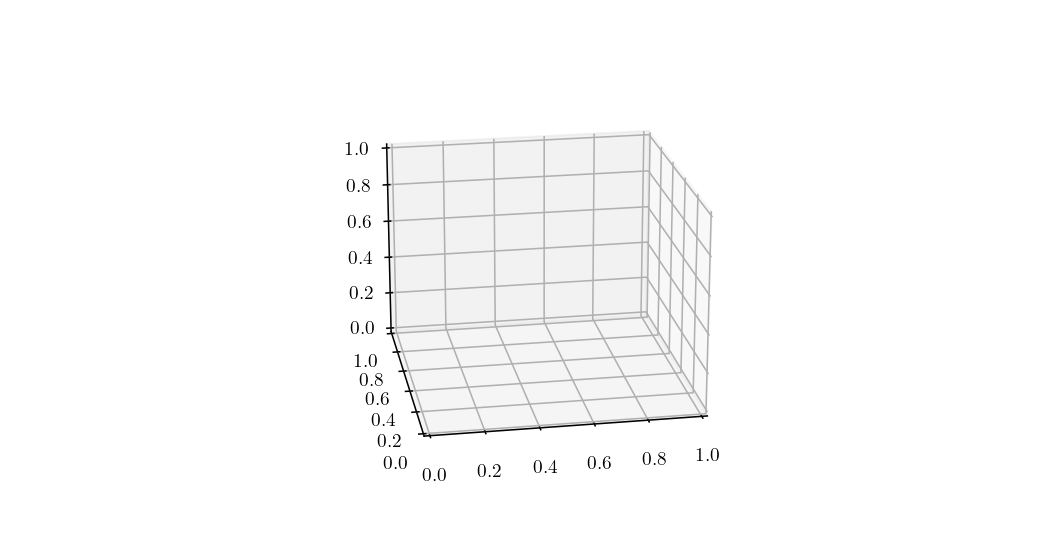

eps tau_n eta
{'L': 1, 'P': 2, 'S': [1, 2], 'eps': 0.7071067811865475, 'eta': 0.9, 'J0_l': array([[0.]]), 'I_ext': 1, 'rateWnt': 1.0, 'kappa': [1.0, 1.0], 'alpha_0': 0.01, 'Psi_0': 0.0, 'tau_M': 0.01, 'J0': [-1.0, 1.0], 'tau_I': [0.01, 0.005, 0.2], 'tau_n': 0.0, 'tau_norm': 1.0, 'mode': 0, 'mode_stats': 0, 'mode_calc': 0, 'mode_selfcon': 0, 'simulation': {'eps': [0, 0.7071067811865476], 'eta': [0, 0.99], 'sim_prim': [0, -1, 0], 'sim_sec': [0, -1, 0]}}
{'L': 1, 'P': 2, 'S': [1, 2], 'eps': 0.7071067811865475, 'eta': 0.9, 'J0_l': array([[0.]]), 'I_ext': 1, 'rateWnt': 1.0, 'kappa': [1.0, 1.0], 'alpha_0': 0.01, 'Psi_0': 0.0, 'tau_M': 0.01, 'J0': [-1.0, 1.0], 'tau_I': [0.01, 0.005, 0.2], 'tau_n': 0.1, 'tau_norm': 1.0, 'mode': 0, 'mode_stats': 0, 'mode_calc': 0, 'mode_selfcon': 0, 'simulation': {'eps': [0, 0.7071067811865476], 'eta': [0, 0.99], 'sim_prim': [0, -1, 0], 'sim_sec': [0, -1, 0]}}
{'L': 1, 'P': 2, 'S': [1, 2], 'eps': 0.7071067811865475, 'eta': 0.9, 'J0_l': array([[0.]]), 'I_ext': 1

KeyError: 'DM_trans'

In [112]:
rerun = True
steps = 100
fig,ax = plt.subplots(1,1,figsize=(7.5,4))

ax_3D = plt.axes(ax.get_position(),projection='3d')
ax.remove()
ax_3D.view_init(20, -100)

simulation_array = {
    'eps':[0,np.sqrt(1./2)],
    'eta': [0,0.99],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}

px,pz = [o for o in list(simulation_array) if not o.startswith('sim')]
py = 'tau_n'
print(px,py,pz)

results = []
tau_ns = [0.,0.1,0.2,0.4,0.7,1.]
for i,tau_n in enumerate(tau_ns):
    
    options = set_option_params(simulation_array,nE=1)
    options['tau_n'] = tau_n
    options['mode_stats'] = 0
    
    print(options)
    
    res = darkMatter(steps=steps,options=options,cleanup=False,rerun=rerun,compile=False,logging=3)
    results.append(res)

plot_3D(ax_3D,results,[px,py,pz],rateWnts)

In [109]:
res.keys()

dict_keys(['eps', 'eta', 'q', 'gamma', 'delta', 'rate_max', 'chi', 'I_balance', 'regions', 'implausible', 'filePaths'])